# Financial History Analysis
* Source 
    * [Machine Learning - Get Your Hands Dirty by Solving Real Industry Challenges with Python](https://nlbsg.udemy.com/course/machine-learning-practical/learn/lecture/11839244#overview)
* Predict if a customer will sign a loan based on their financial history

## Data

* Financial history of customers
    * Age, time employed, etc. 
* Risk scores that are already created based on above features
* Label
    * e-signed
    * Indicate whether user has completed the e-signing process for the loan

## Process
* [Import Source Data](#Import-Source-Data)
* [EDA](#EDA)
    * [Data Cleaning](#Data-Cleaning)
    * [Feature Distribution](#Feature-Distribution)
    * [Feature Correlation With Label](#Feature-Correlation-With-Label)
    * [Feature Correlation Matrix](#Feature-Correlation-Matrix)
* [Feature Engineering](#Feature-Engineering)
* [Data Pre-Procesing](#Data-Pre-Processing)
    * [Label Extraction](#label-extraction)
    * [Train Test Split](#train-test-split)
    * [Feature Normalization](#feature-normalization)
* [Model Building](#Model-Building)
    * [Train](#train)
    * [Predict](#predict)
    * [Evaluate](#evaluate)
* [Model Conclusion](#Model-Conclusion)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [2]:
%matplotlib inline

In [57]:
random.seed(100)

### Import Source Data

In [3]:
dataset = pd.read_csv('./dataset/P39-Financial-Data.csv')

### EDA

In [4]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


#### Data  Cleaning

In [7]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

#### Feature Distribution

* Only want to plot the numerical features
* Drop label
    * `e_signed` is the label 
* Drop categorical features
    * `pay_schedule` is categorical
* Drop NA values (already checked by last step)
* Drop cols that we don't care about
    * `entry_id` is just an index

In [13]:
dataset.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [15]:
dataset_eda = dataset.drop(columns=["e_signed", "pay_schedule", "entry_id"])

/var/folders/dx/spp2spg10dv8rnxn53dlhmx40000gn/T/ipykernel_47833/940310041.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 3, i+1)


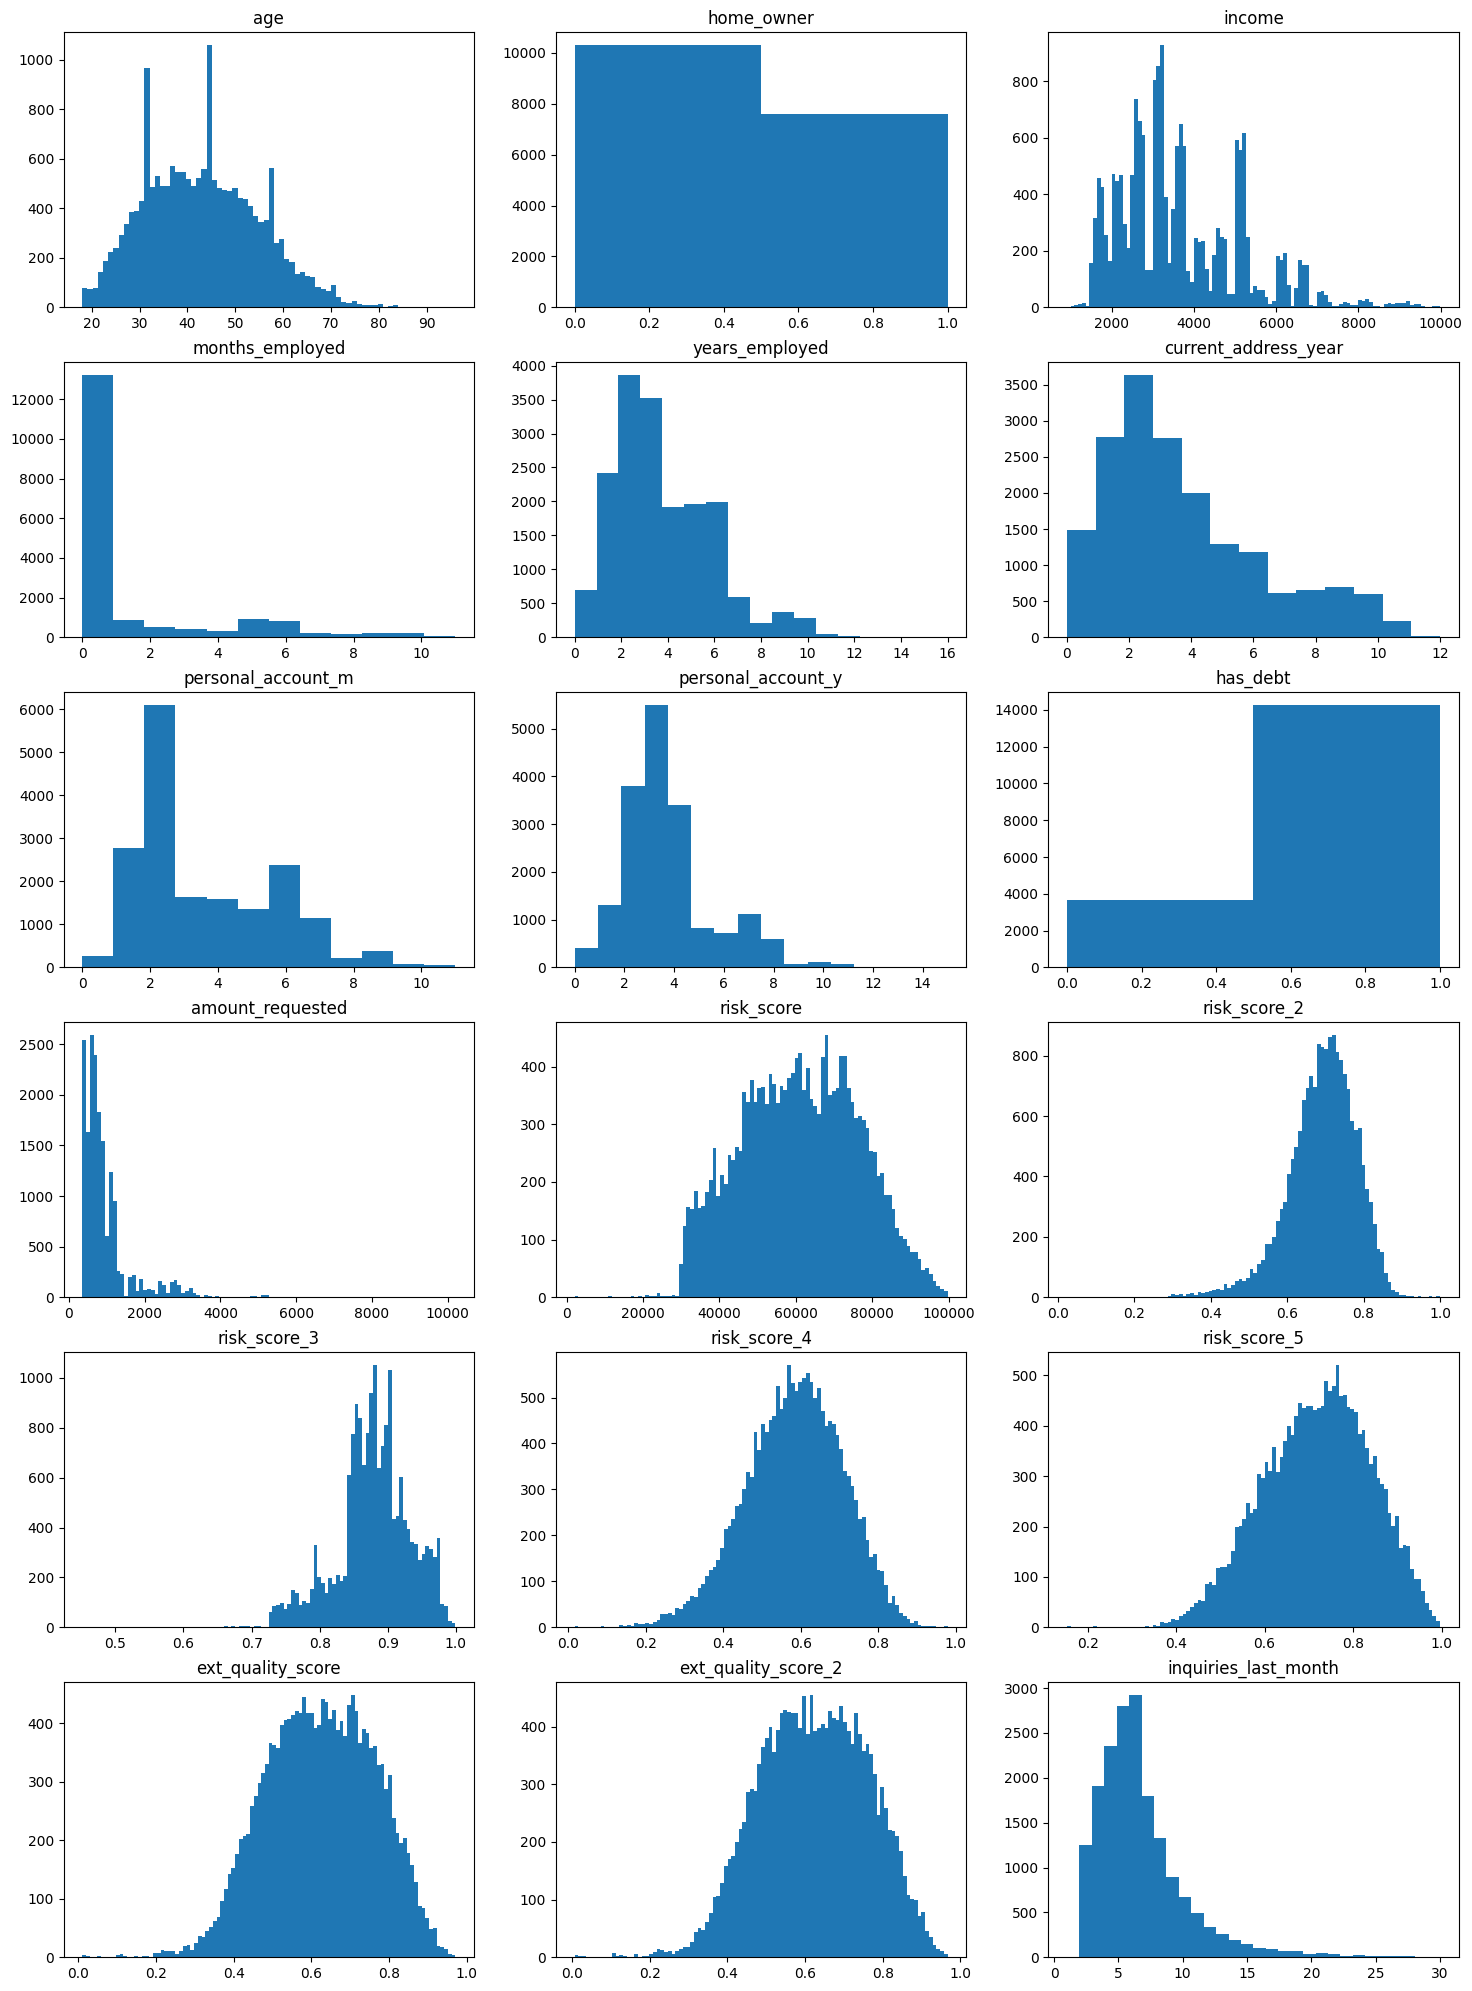

In [32]:
fig = plt.figure(figsize=(18, 25))
plt.title("Distribution of Features")

for i in range(dataset_eda.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(dataset_eda.columns.values[i])

    data = dataset_eda[dataset_eda.columns.values[i]]
    data_size = np.size(data.unique())
    if data_size > 100:
        data_size = 100

    plt.hist(data, bins=data_size)


#### Feature Correlation With Label

<Axes: title={'center': 'Feature Correlation with e_signed'}>

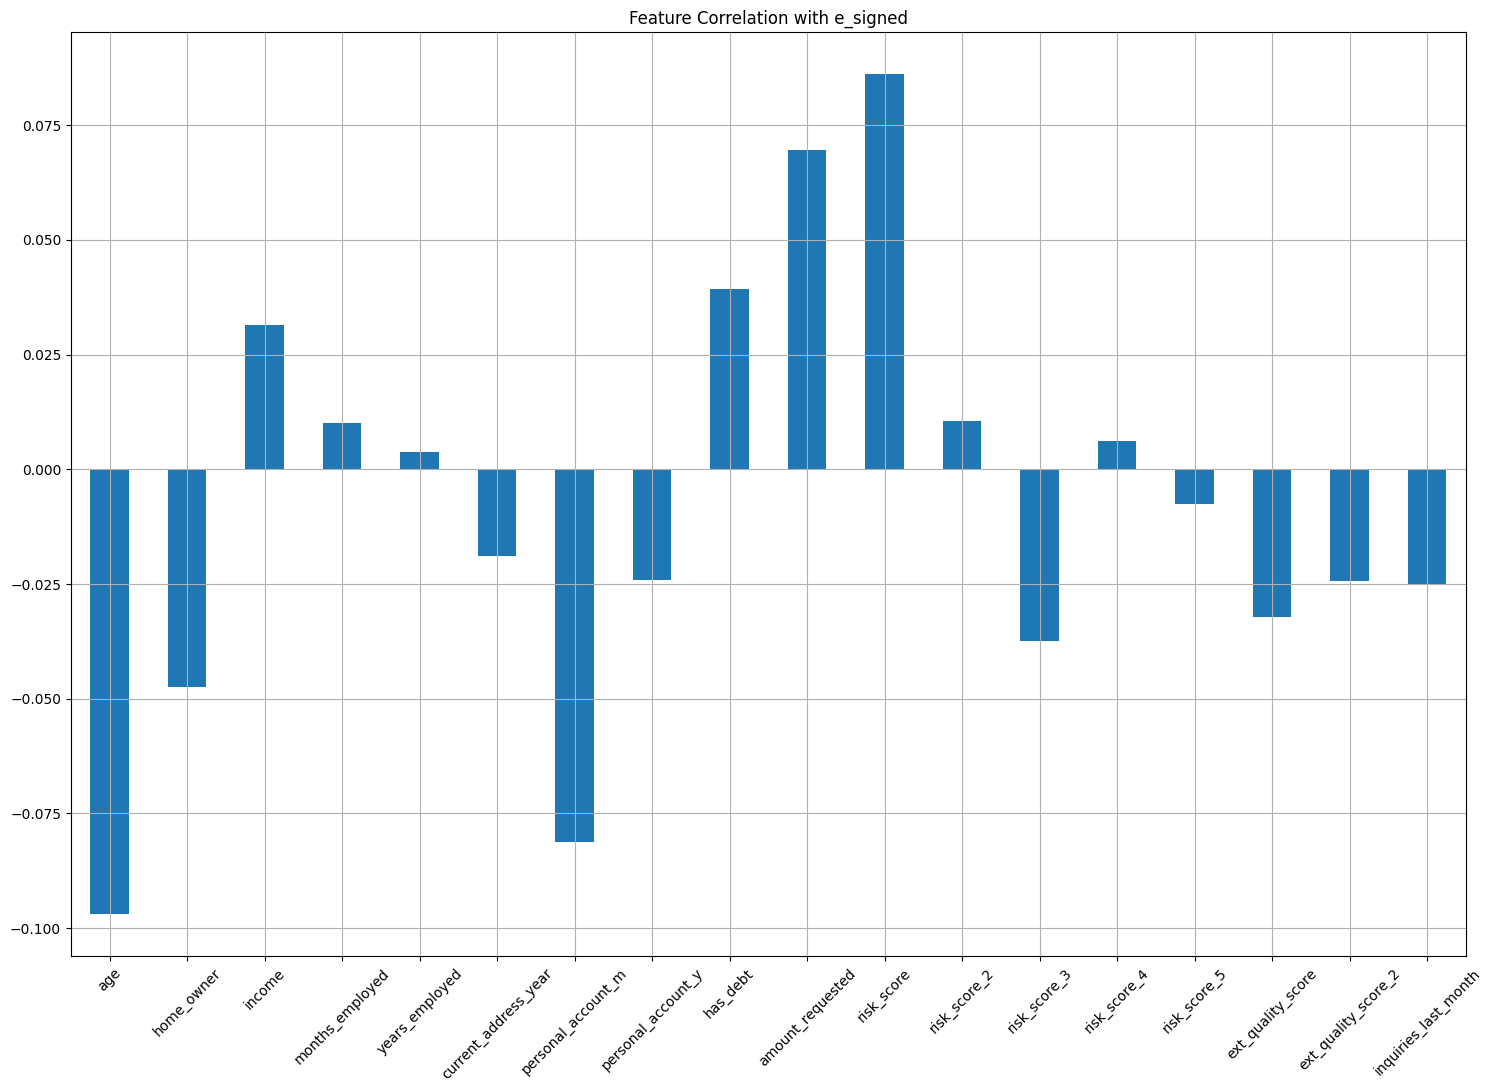

In [40]:
dataset_eda.corrwith(dataset['e_signed']).plot.bar(
    figsize = (18, 12),
    title = 'Feature Correlation with e_signed',
    rot = 45,
    grid = True
)

#### Feature Correlation Matrix

<Axes: >

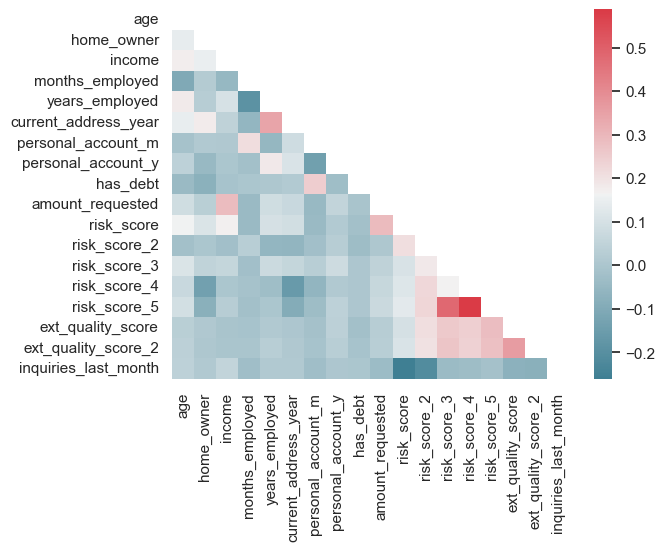

In [55]:
sns.set(style="white")

corr = dataset_eda.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

### Feature Engineering

The `month_employed` looks a bit faulty <br>
Consider removing it.

<Axes: ylabel='Frequency'>

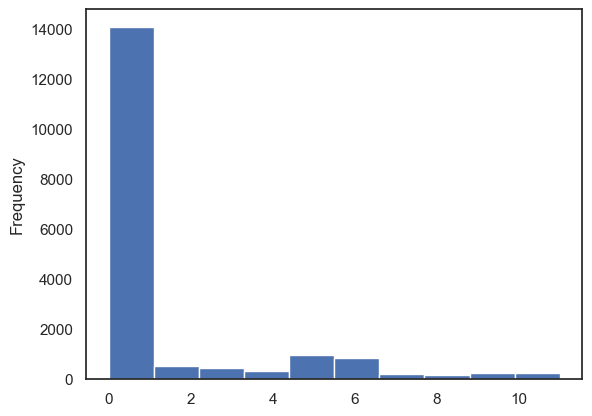

In [62]:
dataset["months_employed"].plot.hist()

In [63]:
dataset = dataset.drop(columns='months_employed')

Combine `personal_account_m` & `personanl_account_y` into a single feature `personal_account_months`

In [65]:
dataset['personal_account_months'] = dataset['personal_account_m'] + 12 * dataset['personal_account_y']
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [66]:
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

### Data Pre-Processing

#### Label Extraction

#### Train Test Split

#### Feature Normalization

### Model Building

#### Train

#### Predict

#### Evaluate

### Model Conclusion